In [ ]:
# -*- coding: utf-8 -*-
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


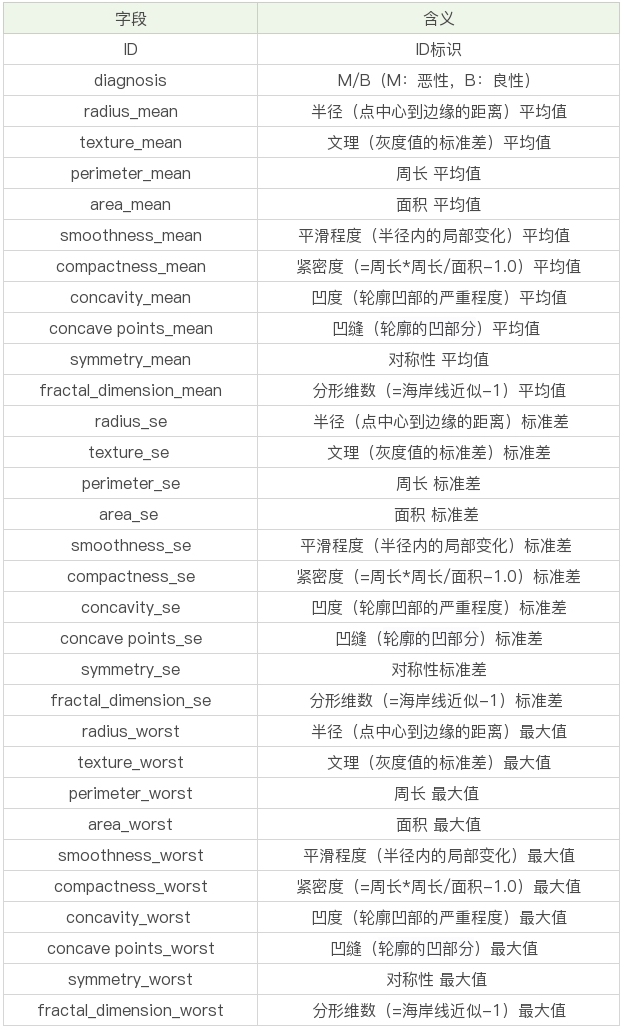

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# load data
data = pd.read_csv("/content/drive/My Drive/Data Analysis Example/cancer_svm_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Data mining
# There are many columns in the dataframe, we need to list them all
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head(5))
print(data.describe())

In [ ]:
# Group the features into three groups
features_mean= list(data.columns[2:12])
features_se= list(data.columns[12:22])
features_worst=list(data.columns[22:32])
# Data Cleansing
# ID column is useless, drop it
data.drop("id",axis=1,inplace=True)
# change the flag column's string to integers for further analysis
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


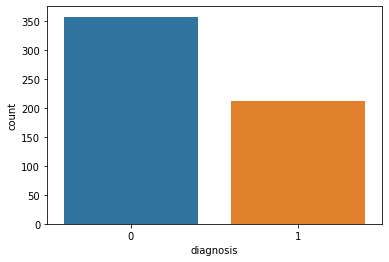

In [ ]:
# visualize the diagonosis result
sns.countplot(data['diagnosis'],label="Count")
plt.show()

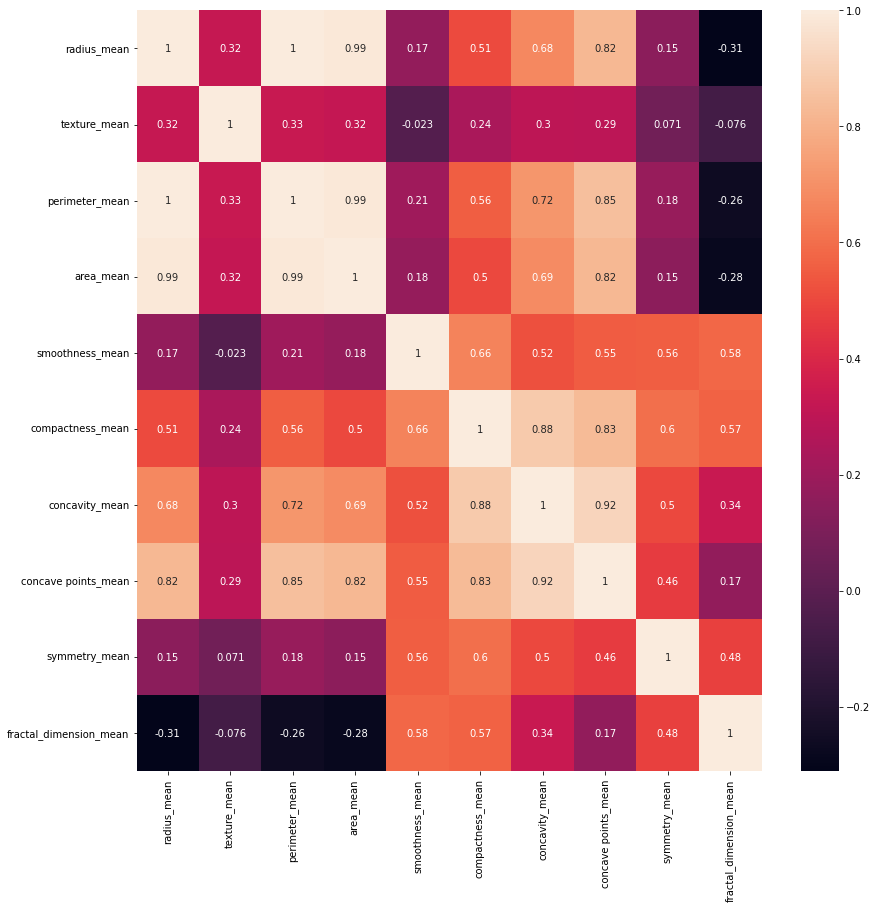

In [ ]:
# Use heatmap to visualize the correlation between mean features
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True, visualize the data inside each block
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Choose uncorrelated features
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean']

# Separate 30% data as training data
train, test = train_test_split(data, test_size = 0.3)
# Only use the selected features
train_X = train[features_remain]
train_y = train['diagnosis']
test_X = test[features_remain]
test_y = test['diagnosis']

# Z-Score scaling
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

# Non-linear SVM

In [ ]:
# Create SVM classifier
model = svm.SVC()
# train the model
model.fit(train_X,train_y)
# predict using the test data
prediction = model.predict(test_X)
print('Accuracy: ', metrics.accuracy_score(prediction,test_y))

# Linear SVM

In [ ]:
# Create SVM classifier
model = svm.LinearSVC()
# train the model
model.fit(train_X,train_y)
# predict using the test data
prediction=model.predict(test_X)
print('Accuracy: ', metrics.accuracy_score(prediction,test_y))